# Example 2 - Sin(x) 1d function 

In this example, we will show how to locate the maximum of a simple 1d function via Bayesian Optimization. 
The objective function has an analytical form of 
$$ y = sin(x) $$

where x is the independent variable (input parameter) and y is the dependent variable (output response or target). 
The goal is locate the x value where y is optimized (maximized in this case).

The details of this example is summarized in the table below:

| Key Item      | Description |
| :----------------- | :----------------- |
| Goal | Maximization |
| Objective function | sin(x) |
| Input (X) dimension | 1 |
| Output (Y) dimension | 1 |
| Analytical form available? | Yes |
| Acqucision function | Expected improvement (EI) |
| Initial Sampling | Random | 

Next, we will go through each step in Bayesian Optimization.


## 1. Import `nextorch` and other packages

In [1]:
import os
import sys
project_path = os.path.abspath(os.path.join(os.getcwd(), '..\..'))
sys.path.insert(0, project_path)

import numpy as np
from nextorch import plotting, bo, doe, utils

## 2. Define the objective function and the design space
We use a Python lambda function as the objective function `objective_func`. 

The range of the input `X_ranges` is between 0 and $2 \pi$. 

In [2]:
# Objective function
objective_func = lambda x: np.sin(x)

# Set the ranges
X_range = [0, np.pi*2]


## 3. Define the initial sampling plan
We choose 4 random points as the initial sampling plan `X_init`.

Note that `X_init` generated from `doe` methods are always in unit scales. If we want the sampling plan in real scales, we should use `utils.inverse_unitscale_X(X_init, X_range)` to obtain `X_init_real`.

The initial reponse in a real scale `Y_init_real` is computed from the objective function.

In [3]:
# Randomly choose some points
# Sampling X is in a unit scale in [0, 1]
X_init = doe.randomized_design(n_dim = 1, n_points = 4, seed = 0)
#or we can do np.random.rand(4,1)

# Get the initial responses
Y_init_real = bo.eval_objective_func(X_init, X_range, objective_func)

# X in a real scale can be obtained via
X_init_real = utils.inverse_unitscale_X(X_init, X_range)
# The reponse can also be obtained by
# Y_init_real = objective_func(X_init_real)

## 4. Initialize an `Experiment` object 

An `Experiment` requires the following key components:
- Name of the experiment, used for output folder name
- Input independent variables X: `X_init` or `X_init_real`
- List of X ranges: `X_ranges`
- Output dependent variables Y: `Y_init` or `Y_init_real`

Optional:
- `unit_flag`: `True` if the input X matrix is a unit scale, else `False`
- `objective_func`: Used for test plotting
- `maximize`: `True` if we look for maximum, else `False` for minimum


In [4]:
#%% Initialize an Experiment object
# Set its name, the files will be saved under the folder with the same name
Exp = bo.Experiment('sin_1d') 
# Import the initial data
Exp.input_data(X_init, Y_init_real, unit_flag = True, X_ranges = X_range)

# Set the optimization specifications 
# here we set the objective function, minimization by default
Exp.set_optim_specs(objective_func = objective_func, maximize= True)

Iter 10/100: 3.3435420989990234
Iter 20/100: 3.210639238357544
Iter 30/100: 3.10588002204895
Iter 40/100: 2.7233145236968994


## 5. Run trials 
We use the same setup in the optimization loop as [example 1](01_simple_1d.ipynb). 


Iteration 1, objective function


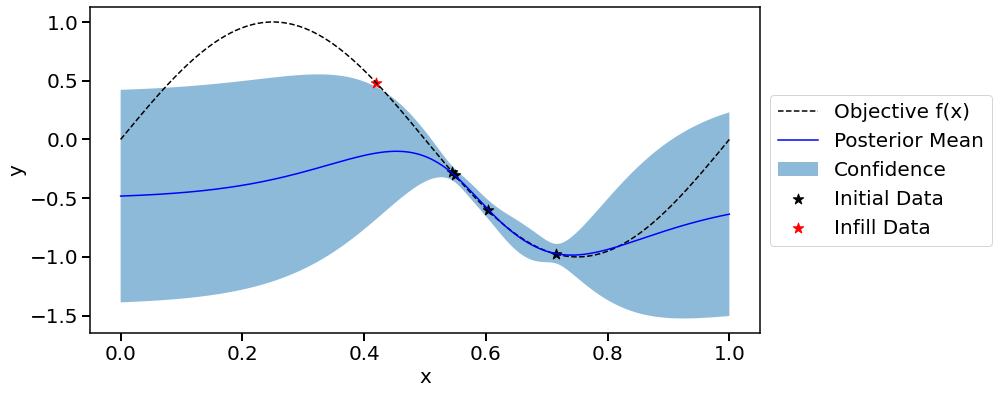

Iteration 1, acquisition function


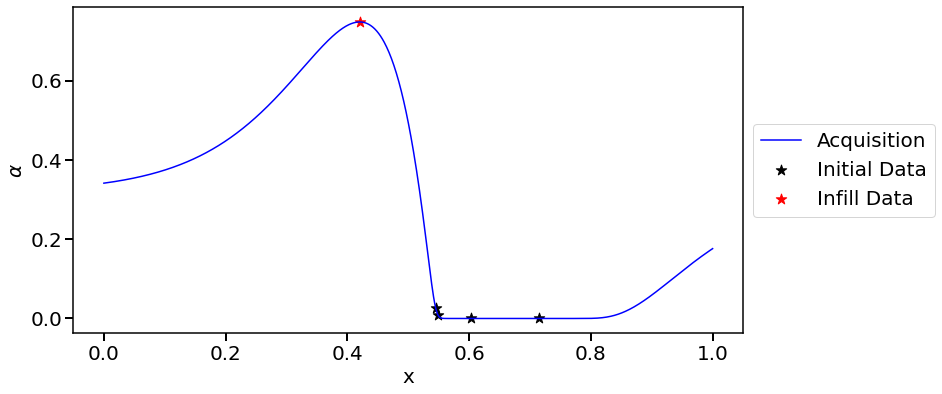

Iter 10/100: 2.115607500076294
Iter 20/100: 2.047811985015869
Iter 30/100: 2.0096781253814697
Iter 40/100: 1.983288049697876
Iter 50/100: 1.9630168676376343
Iter 60/100: 1.9468294382095337
Iter 70/100: 1.9342588186264038
Iter 80/100: 1.9232877492904663
Iter 90/100: 1.9136533737182617
Iter 100/100: 1.9052388668060303
Iteration 2, objective function


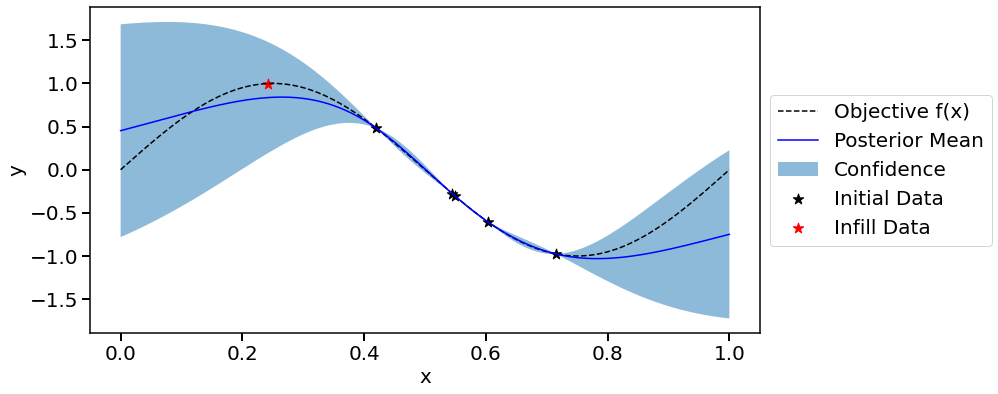

Iteration 2, acquisition function


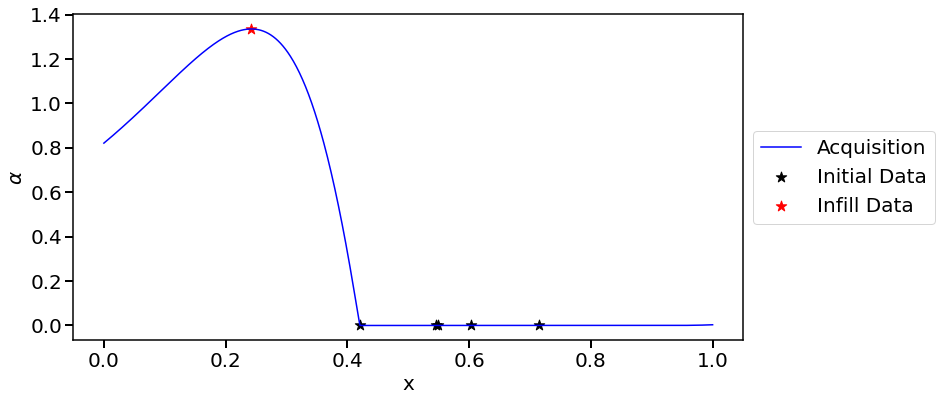

Iter 10/100: 1.7441264390945435
Iter 20/100: 1.731417179107666
Iter 30/100: 1.7203856706619263
Iter 40/100: 1.7135215997695923
Iter 50/100: 1.7079821825027466
Iter 60/100: 1.7038270235061646
Iter 70/100: 1.7002414464950562
Iter 80/100: 1.6975001096725464
Iter 90/100: 1.694836139678955
Iter 100/100: 1.693765640258789
Iteration 3, objective function


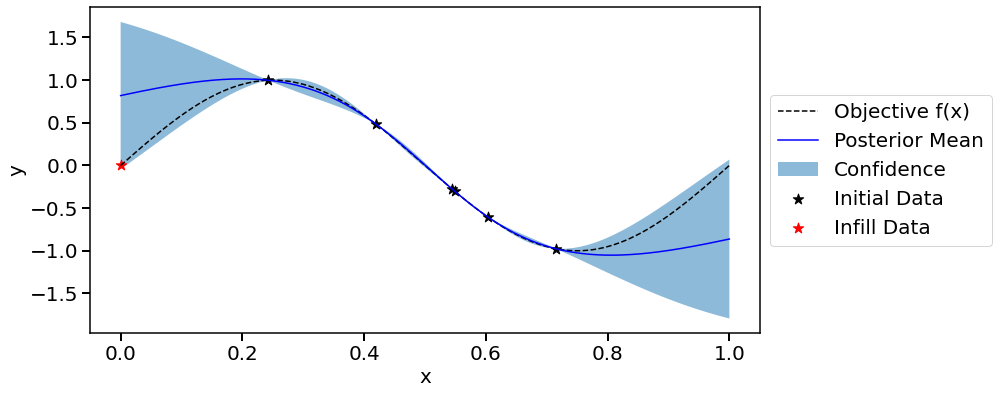

Iteration 3, acquisition function


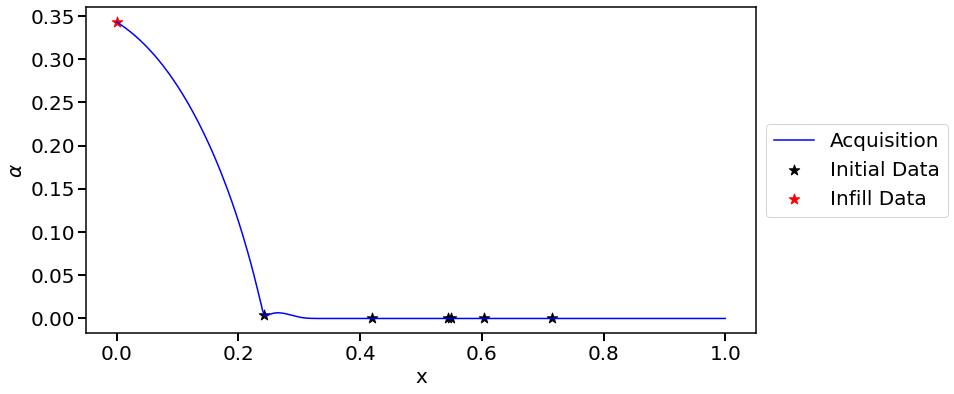

Iter 10/100: 1.8507091999053955
Iter 20/100: 1.8342643976211548
Iter 30/100: 1.8303687572479248
Iteration 4, objective function


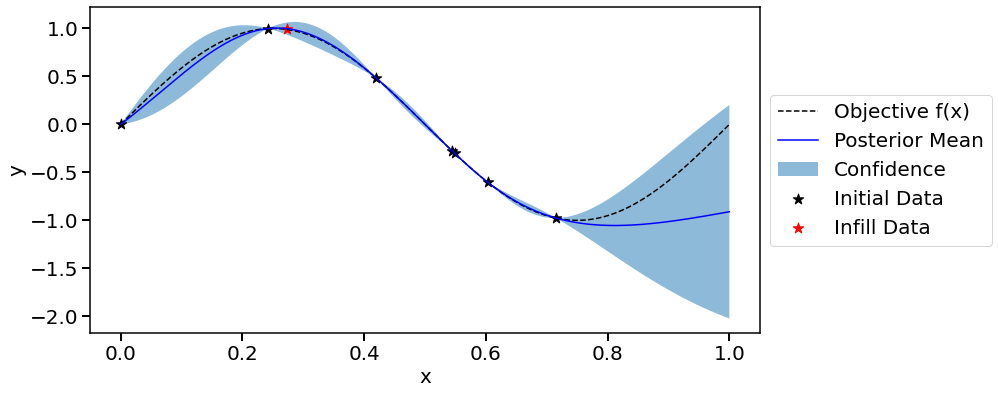

Iteration 4, acquisition function


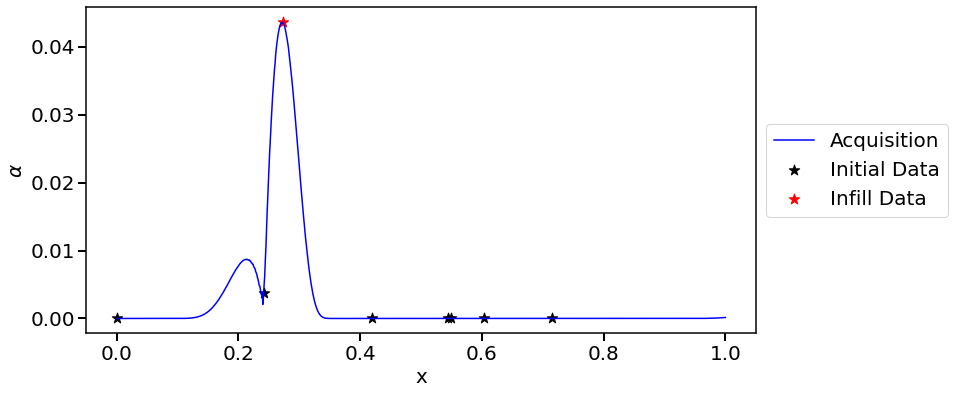

Iter 10/100: 1.4301031827926636
Iter 20/100: 1.4279428720474243
Iter 30/100: 1.4273415803909302
Iteration 5, objective function


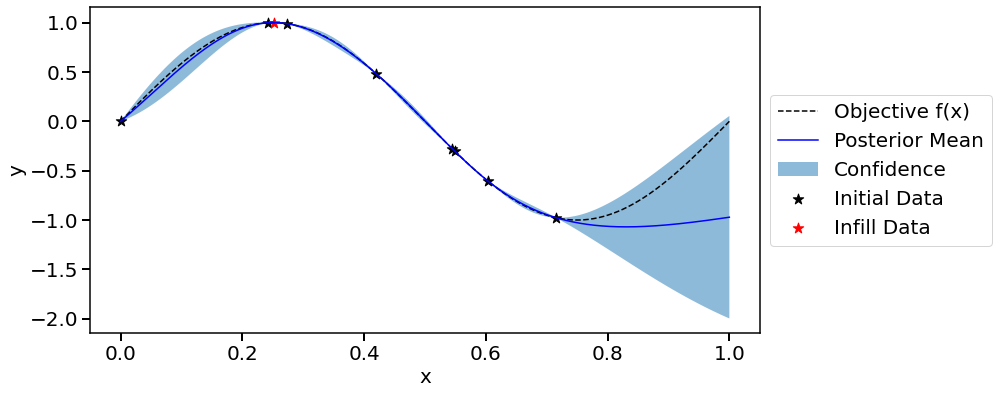

Iteration 5, acquisition function


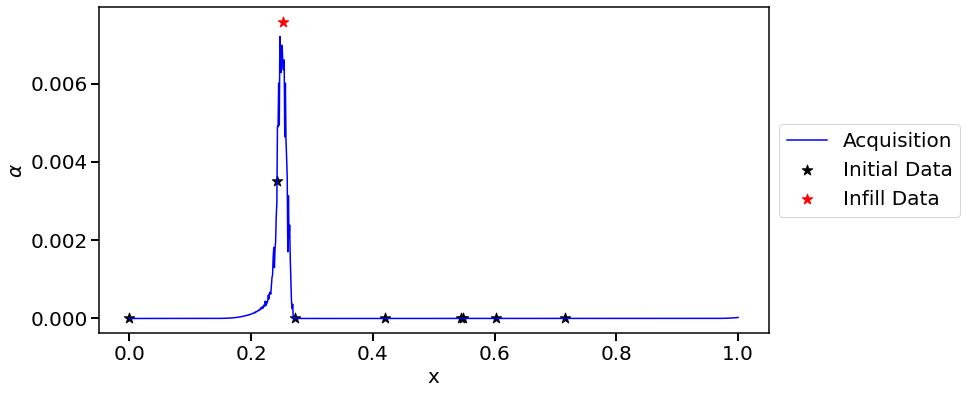

Iter 10/100: 0.8912678956985474
Iteration 6, objective function


/opt/anaconda3/envs/torch/lib/python3.7/site-packages/gpytorch/distributions/multivariate_normal.py:230: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-06.
  NumericalWarning,


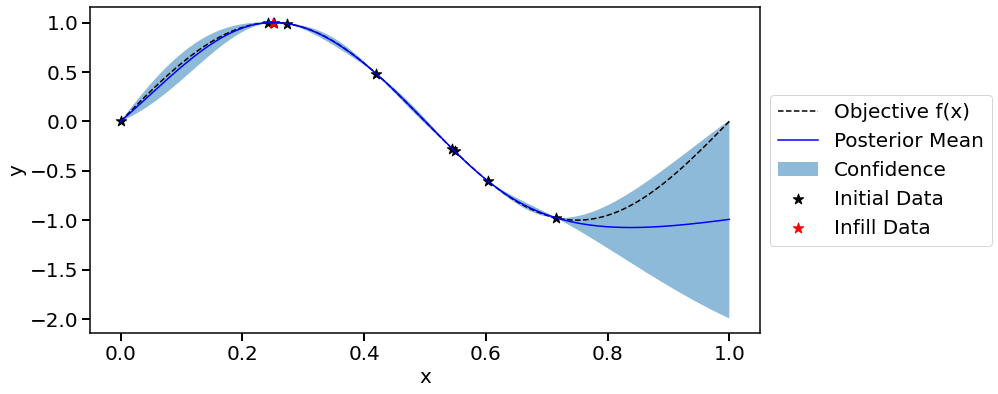

Iteration 6, acquisition function


/opt/anaconda3/envs/torch/lib/python3.7/site-packages/gpytorch/distributions/multivariate_normal.py:230: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-06.
  NumericalWarning,


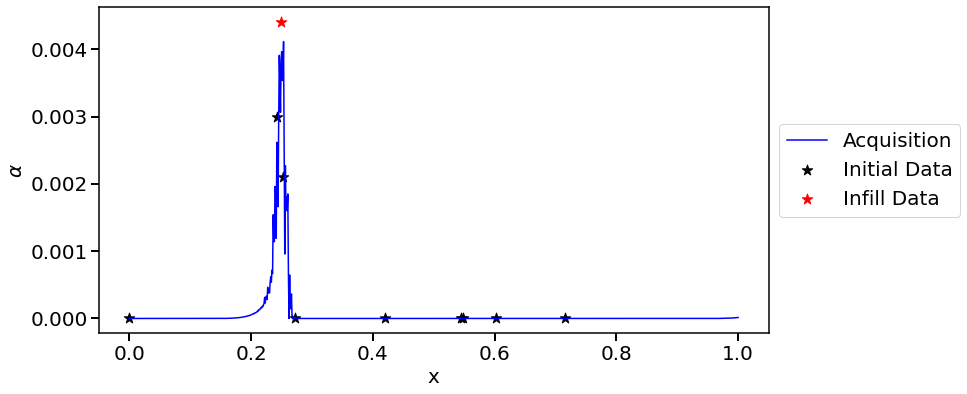

Iter 10/100: 0.4493933320045471
Iteration 7, objective function


/opt/anaconda3/envs/torch/lib/python3.7/site-packages/gpytorch/distributions/multivariate_normal.py:230: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-06.
  NumericalWarning,


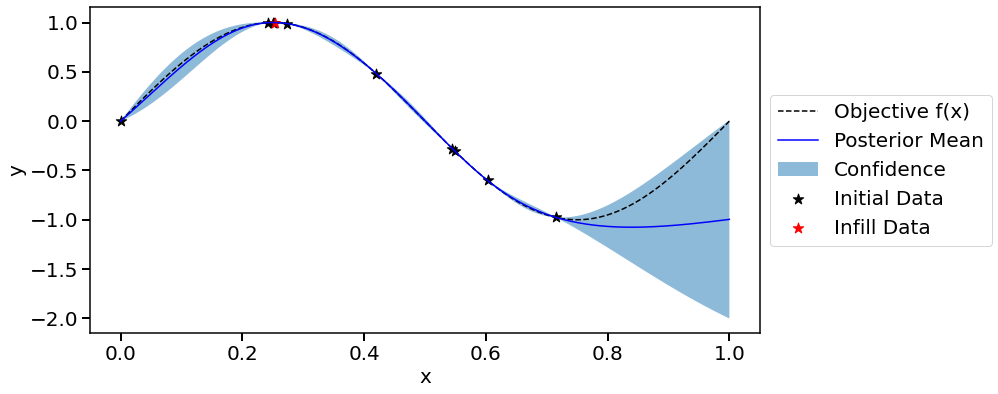

Iteration 7, acquisition function


/opt/anaconda3/envs/torch/lib/python3.7/site-packages/gpytorch/distributions/multivariate_normal.py:230: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-06.
  NumericalWarning,


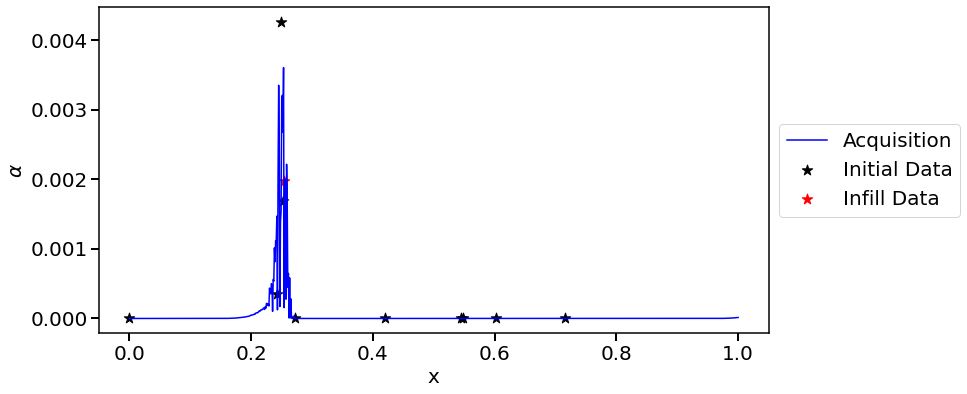

Iter 10/100: 0.08630480617284775
Iteration 8, objective function


/opt/anaconda3/envs/torch/lib/python3.7/site-packages/gpytorch/distributions/multivariate_normal.py:230: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-06.
  NumericalWarning,


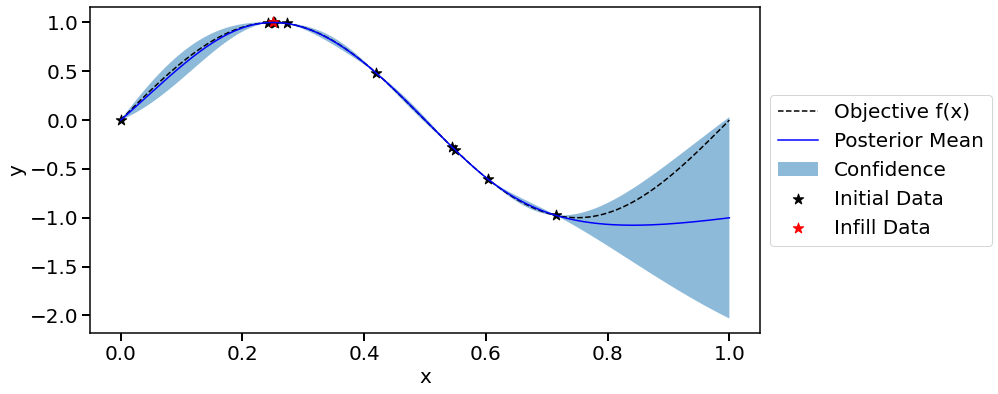

Iteration 8, acquisition function


/opt/anaconda3/envs/torch/lib/python3.7/site-packages/gpytorch/distributions/multivariate_normal.py:230: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-06.
  NumericalWarning,
/opt/anaconda3/envs/torch/lib/python3.7/site-packages/gpytorch/distributions/multivariate_normal.py:230: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-06.
  NumericalWarning,


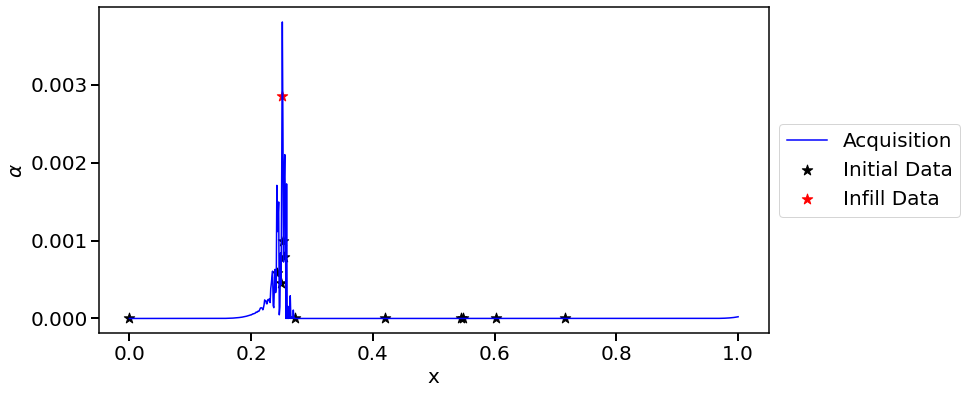

Iter 10/100: -0.22007723152637482
Iteration 9, objective function


/opt/anaconda3/envs/torch/lib/python3.7/site-packages/gpytorch/distributions/multivariate_normal.py:230: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-06.
  NumericalWarning,


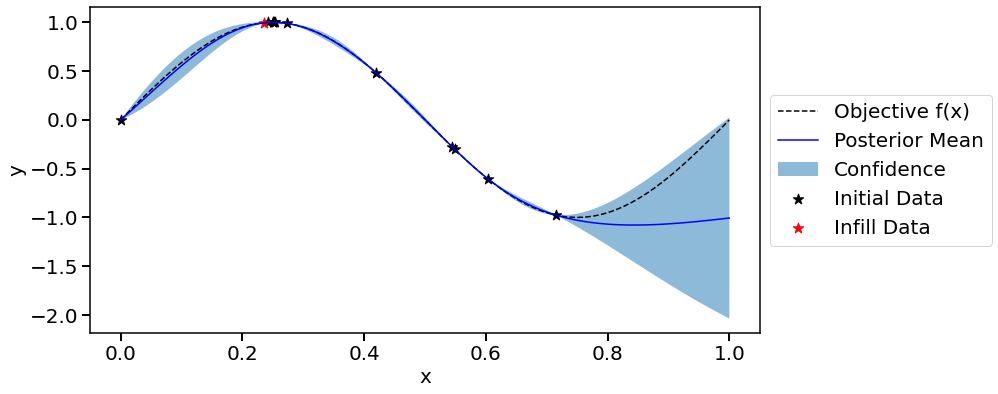

Iteration 9, acquisition function


/opt/anaconda3/envs/torch/lib/python3.7/site-packages/gpytorch/distributions/multivariate_normal.py:230: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-06.
  NumericalWarning,
/opt/anaconda3/envs/torch/lib/python3.7/site-packages/gpytorch/distributions/multivariate_normal.py:230: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-06.
  NumericalWarning,


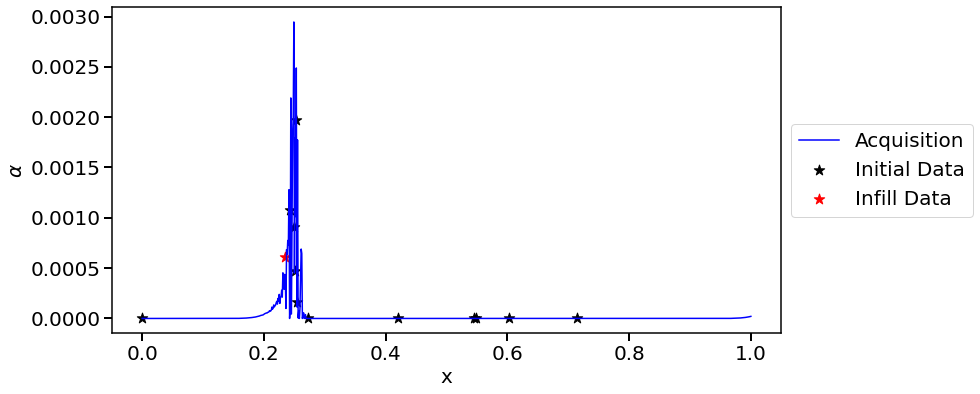

Iter 10/100: -0.4495237171649933
Iteration 10, objective function


/opt/anaconda3/envs/torch/lib/python3.7/site-packages/gpytorch/distributions/multivariate_normal.py:230: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-06.
  NumericalWarning,


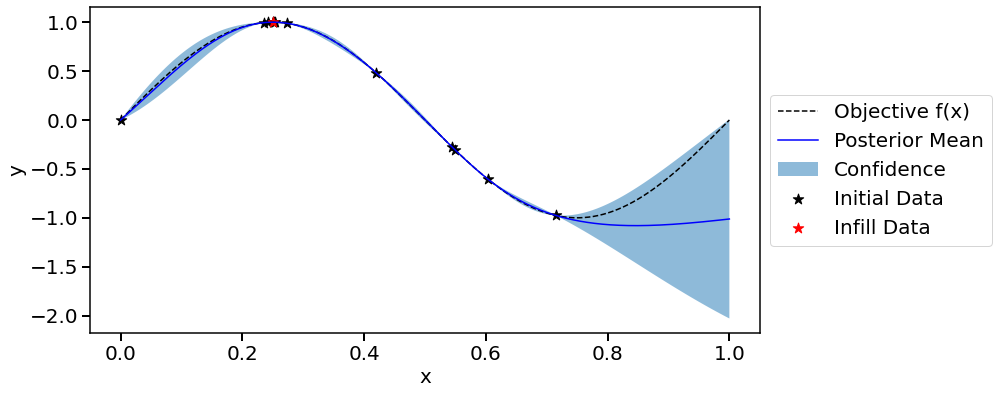

Iteration 10, acquisition function


/opt/anaconda3/envs/torch/lib/python3.7/site-packages/gpytorch/distributions/multivariate_normal.py:230: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-06.
  NumericalWarning,
/opt/anaconda3/envs/torch/lib/python3.7/site-packages/gpytorch/distributions/multivariate_normal.py:230: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-06.
  NumericalWarning,


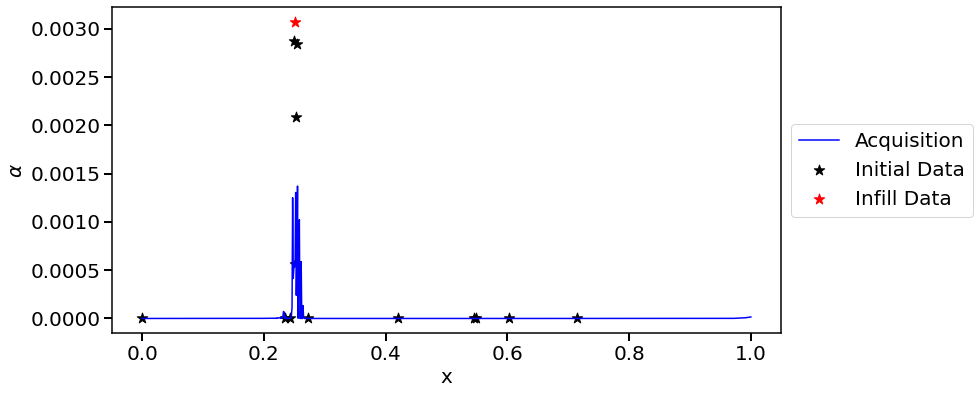

Iter 10/100: -0.6728174090385437


In [5]:
# Create test data points for plotting
X_test = np.linspace(0, 1, 1000)

# Set a flag for saving png figures
save_fig_flag = False

# Set the number of iterations  
n_trials = 10

# Optimization loop
for i in range(n_trials):
    # Generate the next experiment point
    # X_new is in a unit scale
    # X_new_real is in a real scale defined in X_ranges
    # Select EI as the acquisition function 
    X_new, X_new_real, acq_func = Exp.generate_next_point(acq_func_name = 'EI')
    # Get the reponse at this point
    Y_new_real = objective_func(X_new_real)
    
    # Plot the objective functions, and acqucision function
    print('Iteration {}, objective function'.format(i+1))
    plotting.objective_func_1d_exp(Exp, X_test = X_test, X_new = X_new, plot_real = True, save_fig = save_fig_flag)
    print('Iteration {}, acquisition function'.format(i+1))
    plotting.acq_func_1d_exp(Exp, X_test = X_test, X_new = X_new, save_fig = save_fig_flag)
    
    # Input X and Y of the next point into Exp object
    # Retrain the model 
    Exp.run_trial(X_new, X_new_real, Y_new_real)


## 6. Validate the final model
Get the optimum value, locations, and plot the parity plot for training data. 

For $sin(x)$ in $[0, 2\pi]$, the optimum should be $ y_{opt} = 1$  at $ x = \pi/2 $. We see the algorithm is able to place a point near the optimum region in iteration 2. 


The best reponse is Y = 0.9999979055909644 at X = [1.56874967]


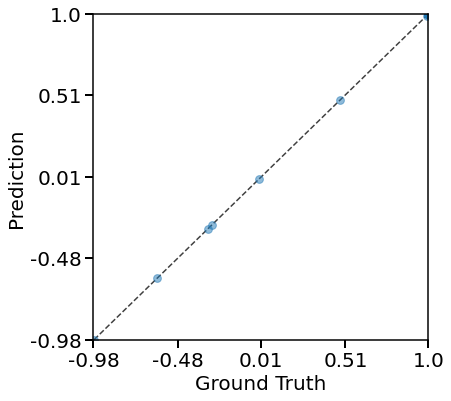

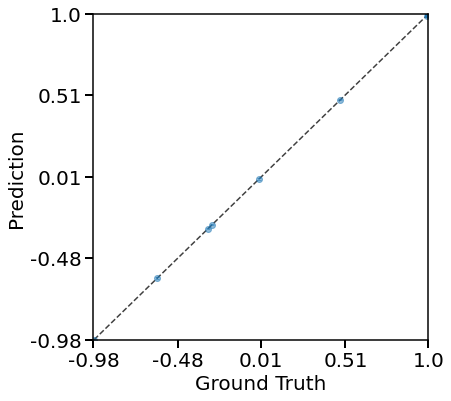

In [6]:
# Obtain the optimum
y_opt, X_opt, index_opt = Exp.get_optim()
print('The best reponse is Y = {} at X = {}'.format(y_opt, X_opt))

# Make a parity plot comparing model predictions versus ground truth values
plotting.parity_exp(Exp, save_fig = save_fig_flag)
# Make a parity plot with the confidence intervals on the predictions
plotting.parity_with_ci_exp(Exp, save_fig = save_fig_flag)

[Thumbnail](_images/02.png) of this notebook